In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
%config Completer.use_jedi = True
from sklearn.impute import SimpleImputer

In [2]:
untouched_df = pd.read_excel('data.xlsx')

In [3]:
df = untouched_df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64678 entries, 0 to 64677
Data columns (total 42 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   ID проекта                                            64678 non-null  object        
 1   ID корпуса                                            64678 non-null  object        
 2   Проект                                                64678 non-null  object        
 3   Локация                                               64678 non-null  object        
 4   Округ                                                 64675 non-null  object        
 5   Район                                                 64678 non-null  object        
 6   Адрес корпуса                                         64678 non-null  object        
 7   Стадия строительной готовности на дату договора       64678 non-null  object

In [5]:
df = df.drop(['ID проекта', 'ID корпуса', 'Локация', 'ID лота', 'Расчетный бюджет объекта', 'Кол-во месяцев обременения', 'Рост бюджета покупки за период экспонирования', 'Округ', 'Месяц и год даты договора','Месяц и год даты регистрации'], axis=1)

In [6]:
df = df.rename(columns={'Количество комнат в прайс-листе, типология bnmap.pro': 'Количество комнат'})

In [7]:
df.head()

,Проект,Район,Адрес корпуса,Стадия строительной готовности на дату договора,Заявленный срок ввода в эксплуатацию,Старт продаж,Класс,Девелопер,Дата договора,Квартал и год договора,Год договора,Дата регистрации,Квартал и год регистрации,Год регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
0,Баркли Медовая Долина,НАО,"Крекшино, д. 9 (3 оч.)",Строительство не начато,2020-06-30,2017-05-01,Комфорт,Barkli,2019-01-01,1кв. 2019,2019,2019-02-18,1кв. 2019,2019,Договор участия,квартира,NaN,5,ст,27.43,95325.34,Прайс совпадение площади,без скидки,Скидка 12% на ограниченный пул квартир. Скидка...,С отделкой,ЮЛ,ФЛ,1,Нет,Нет,н/д,н/д
1,Румянцево-Парк,НАО,"Московский п., в районе Румянцево дер., уч. 17...",Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1кв. 2019,2019,2019-05-08,2кв. 2019,2019,Договор участия,квартира,4.0,11,2,62.60,114000.00,Прайс совпадение площади,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,1,Нет,Нет,211,"7,5%"
2,Румянцево-Парк,НАО,"Московский п., в районе Румянцево дер., уч. 17...",Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1кв. 2019,2019,2019-05-08,2кв. 2019,2019,Договор участия,квартира,13.0,22,ст,24.10,143000.00,Прайс совпадение площади,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,3,Нет,Нет,211,"16,3%"
3,Баркли Медовая Долина,НАО,"Крекшино, д. 5 (2 оч.)",Монтажные и отделочные работы,2019-09-30,2016-08-01,Комфорт,Barkli,2019-01-02,1кв. 2019,2019,2019-10-14,4кв. 2019,2019,Договор уступки,квартира,NaN,6,ст,28.22,102625.78,Прайс совпадение площади,без скидки,Скидка 12% на ограниченный пул квартир. Скидка...,Без отделки,ЮЛ,ФЛ,1,Ипотека,Нет,н/д,н/д
4,Саларьево Парк,НАО,"Московский п., в районе дер. Саларьево, к. 15",Монтажные и отделочные работы,2020-03-31,2018-02-01,Комфорт,ПИК,2019-01-03,1кв. 2019,2019,2019-02-13,1кв. 2019,2019,Договор участия,квартира,1.0,21,2,51.20,131700.00,Прайс совпадение площади,без скидки,Скидка до 2% при 100% оплате или ипотеке (дейс...,С отделкой,ЮЛ,ФЛ,1,Нет,Нет,275,"15,0%"


In [8]:
label_dict = {}

def label_encode(name):
    df[name] = pd.Categorical(df[name])
    d = dict(enumerate(df[name].cat.categories))
    inverted_d = {v: k for k, v in d.items()}
    print(name, inverted_d.keys())
    df[name] = df[name].cat.codes
    label_dict.update(inverted_d)

In [9]:
df['Стадия строительной готовности на дату договора'].describe()

count                             64678
unique                                7
top       Монтажные и отделочные работы
freq                              35493
Name: Стадия строительной готовности на дату договора, dtype: object

In [10]:
df['Заявленный срок ввода в эксплуатацию'] = pd.to_datetime(df['Заявленный срок ввода в эксплуатацию'], errors='coerce')

In [11]:
df = df.drop('Год договора', axis=1)
df = df.drop('Год регистрации', axis=1)

In [12]:
def split_quater(name):
    quater,year = [],[]
    for i in df[name]:
        quater.append(i.split(' ')[0][0])
        year.append(i.split(' ')[-1])
    return quater, year

In [13]:
df.insert(9, "Квартал договора", split_quater('Квартал и год договора')[0])
df = df.drop('Квартал и год договора', axis=1)
df['Квартал договора'] = df['Квартал договора'].astype(str).astype(int)
df['Дата договора'] = pd.to_datetime(df['Дата договора'])

In [14]:
df.insert(12, "Квартал регистрации", split_quater('Квартал и год регистрации')[0])
df = df.drop('Квартал и год регистрации', axis=1)
df['Квартал регистрации'] = df['Квартал регистрации'].astype(str).astype(int)

In [15]:
df['Секция']=df['Секция'].replace(float('nan'),0)
imputer = SimpleImputer(missing_values=0, strategy='mean')
df['Секция'] = imputer.fit_transform(df['Секция'].values.reshape(-1, 1))
df['Секция'] = df['Секция'].astype(int)

In [16]:
df = df.dropna(subset = ['Цена за кв. метр'])

In [17]:
df['Количество комнат'] = df['Количество комнат'].replace('ст','студия')
df['Количество комнат'] = df['Количество комнат'].replace(float('nan'),0)
print(df['Количество комнат'].unique())
df = df[df['Количество комнат'] != 0]
df = df[df['Количество комнат'] != 'bez-tipa']
df = df[df['Количество комнат'] != '-']
print(df['Количество комнат'].unique())

['студия' '2' '1' '3' 0 '4' '-']
['студия' '2' '1' '3' '4']


In [18]:
df = df.loc[df['Цена за кв. метр']>0]

In [19]:
# df.to_excel('map.xlsx')

## Transforming for ML

In [20]:
df.head(5)

,Проект,Район,Адрес корпуса,Стадия строительной готовности на дату договора,Заявленный срок ввода в эксплуатацию,Старт продаж,Класс,Девелопер,Дата договора,Квартал договора,Дата регистрации,Квартал регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
0,Баркли Медовая Долина,НАО,"Крекшино, д. 9 (3 оч.)",Строительство не начато,2020-06-30,2017-05-01,Комфорт,Barkli,2019-01-01,1,2019-02-18,1,Договор участия,квартира,4,5,студия,27.43,95325.34,Прайс совпадение площади,без скидки,Скидка 12% на ограниченный пул квартир. Скидка...,С отделкой,ЮЛ,ФЛ,1,Нет,Нет,н/д,н/д
1,Румянцево-Парк,НАО,"Московский п., в районе Румянцево дер., уч. 17...",Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1,2019-05-08,2,Договор участия,квартира,4,11,2,62.60,114000.00,Прайс совпадение площади,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,1,Нет,Нет,211,"7,5%"
2,Румянцево-Парк,НАО,"Московский п., в районе Румянцево дер., уч. 17...",Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1,2019-05-08,2,Договор участия,квартира,13,22,студия,24.10,143000.00,Прайс совпадение площади,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,3,Нет,Нет,211,"16,3%"
3,Баркли Медовая Долина,НАО,"Крекшино, д. 5 (2 оч.)",Монтажные и отделочные работы,2019-09-30,2016-08-01,Комфорт,Barkli,2019-01-02,1,2019-10-14,4,Договор уступки,квартира,4,6,студия,28.22,102625.78,Прайс совпадение площади,без скидки,Скидка 12% на ограниченный пул квартир. Скидка...,Без отделки,ЮЛ,ФЛ,1,Ипотека,Нет,н/д,н/д
4,Саларьево Парк,НАО,"Московский п., в районе дер. Саларьево, к. 15",Монтажные и отделочные работы,2020-03-31,2018-02-01,Комфорт,ПИК,2019-01-03,1,2019-02-13,1,Договор участия,квартира,1,21,2,51.20,131700.00,Прайс совпадение площади,без скидки,Скидка до 2% при 100% оплате или ипотеке (дейс...,С отделкой,ЮЛ,ФЛ,1,Нет,Нет,275,"15,0%"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63040 entries, 0 to 64677
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Проект                                           63040 non-null  object        
 1   Район                                            63040 non-null  object        
 2   Адрес корпуса                                    63040 non-null  object        
 3   Стадия строительной готовности на дату договора  63040 non-null  object        
 4   Заявленный срок ввода в эксплуатацию             62905 non-null  datetime64[ns]
 5   Старт продаж                                     63040 non-null  datetime64[ns]
 6   Класс                                            63040 non-null  object        
 7   Девелопер                                        63040 non-null  object        
 8   Дата договора                       

In [22]:
label_encode('Район')
label_encode('Тип сделки')
label_encode('Тип объекта')
label_encode('Метод определения цены')
label_encode('Включение скидок/акций в ценообразование')
label_encode('Тип продавца')
label_encode('Тип покупателя')
label_encode('Тип ипотеки')
label_encode('Участие объекта в оптовой сделке')
label_encode('Стадия строительной готовности на дату договора')
label_encode('Класс')
label_encode('Девелопер')
label_encode('Отделка по корпусу')

Район dict_keys(['НАО', 'ТАО'])
Тип сделки dict_keys(['Договор уступки', 'Договор участия'])
Тип объекта dict_keys(['апартаменты', 'квартира'])
Метод определения цены dict_keys(['Аналитика по корпусу', 'Аналитика по типу комнатности', 'Крайние значения обновлений', 'Прайс совпадение площади', 'Прайс точное совпадение', 'Цена по последнему историческому слою', 'Цена позже даты сделки'])
Включение скидок/акций в ценообразование dict_keys(['без скидки', 'со скидкой', 'со скидкой и без скидки'])
Тип продавца dict_keys(['ФЛ', 'ЮЛ'])
Тип покупателя dict_keys(['ФЛ', 'ЮЛ'])
Тип ипотеки dict_keys(['Ипотека', 'Нет'])
Участие объекта в оптовой сделке dict_keys(['ДА', 'Нет'])
Стадия строительной готовности на дату договора dict_keys(['Введен в эксплуатацию', 'Монтажные и отделочные работы', 'На дату договора активности по проекту не фиксировалось', 'Начало монтажных работ', 'Получение РВЭ, благоустройство территории', 'Работы нулевого цикла', 'Строительство не начато'])
Класс dict_keys(['Бизнес', 

In [23]:
df['Количество комнат'] = df['Количество комнат'].replace('студия',0)
df['Количество комнат'] = df['Количество комнат'].astype(str).astype(int)

In [24]:
df = df.drop('Проект', axis=1)
df = df.drop('Адрес корпуса', axis=1)

In [25]:
# max может влиять на модель, проверить с min
import re
c = 0
discounts = []
df['Скидки по дате договора'] = df['Скидки по дате договора'].replace(float('nan'),'')
for i in df['Скидки по дате договора']:
    found = "".join(re.findall(r'Скидка \d+%|Скидка до \d+%',i))
    if len(found) != 0:
        max_discount = max([int(i) for i in re.findall('[0-9]+',found)])
        discounts.append(max_discount)
    else:
        discounts.append(0)
        

In [26]:
df['Скидки по дате договора'] = discounts

In [27]:
# н/д в 0 может повлиять на модель!

df['Срок в экспозиции до момента сделки, дней'] = df['Срок в экспозиции до момента сделки, дней'].replace('н/д', 0)
df['Срок в экспозиции до момента сделки, дней'] = df['Срок в экспозиции до момента сделки, дней'].astype(str).astype(int)
df['Срок в экспозиции до момента сделки, дней'] = df['Срок в экспозиции до момента сделки, дней'].abs()

In [28]:
price = df['Рост цены за 1 кв.м за период экспонирования']
price = [float(i.split('%')[0].replace(',','.')) if '%' in i else i for i in price]
df['Рост цены за 1 кв.м за период экспонирования'] = price
df['Рост цены за 1 кв.м за период экспонирования'] = df['Рост цены за 1 кв.м за период экспонирования'].replace('н/д', 0)

In [29]:
df['Старт продаж'][0]

Timestamp('2017-05-01 00:00:00')

In [30]:
df['Заявленный срок ввода в эксплуатацию'][0]

Timestamp('2020-06-30 00:00:00')

In [31]:

df.insert(4, 'Срок ввода в эксплуатацию - Старт продаж' ,(df['Заявленный срок ввода в эксплуатацию'] - df['Старт продаж']).dt.days)


df.insert(8, 'Срок ввода в эксплуатацию - Договор' ,(df['Заявленный срок ввода в эксплуатацию']-df['Дата договора']).dt.days)


df = df.drop(['Заявленный срок ввода в эксплуатацию','Дата договора', 'Старт продаж', 'Дата регистрации'], axis=1)

In [32]:
# print(label_dict)

In [33]:
df['Срок в экспозиции до момента сделки, дней'].mean()

96.99930203045685

In [34]:
df['Срок ввода в эксплуатацию - Старт продаж'].mean()

789.7493839917336

In [35]:
df['Срок ввода в эксплуатацию - Договор'].mean()

492.6765280979254

In [36]:
df['Площадь согласно ПД'].mean()

49.468426078680196

In [37]:
df['Рост цены за 1 кв.м за период экспонирования'].mean()

5.063870558375634

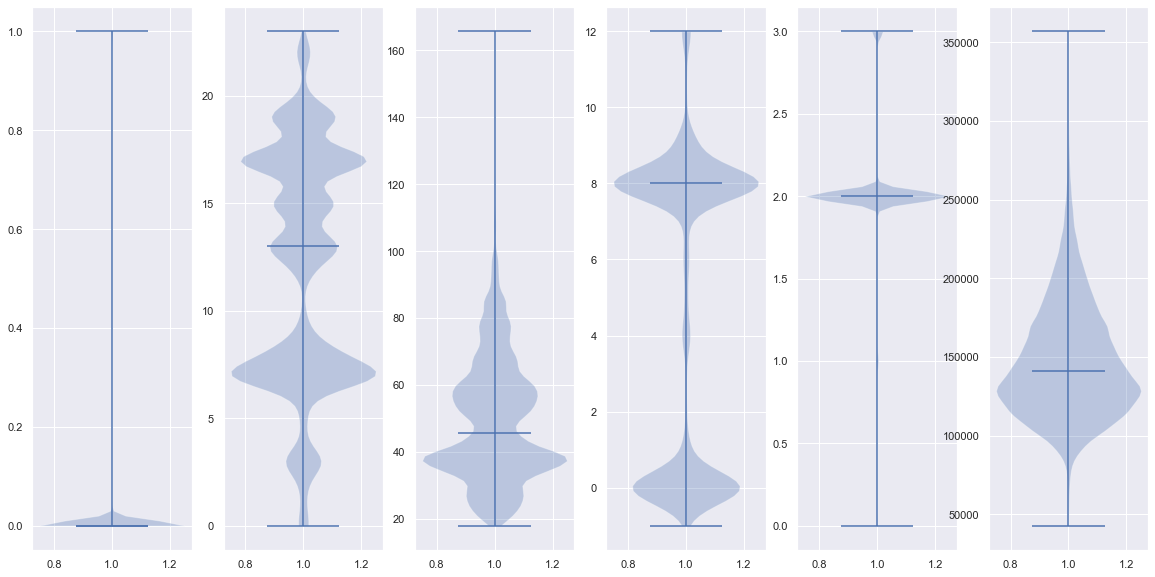

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
cols = list(df.columns)
cols.remove('Цена за кв. метр')
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6)

ax1.violinplot(df['Район'], showmedians=True)
ax2.violinplot(df['Девелопер'], showmedians=True)
ax3.violinplot(df['Площадь согласно ПД'], showmedians=True)
ax4.violinplot(df['Отделка по корпусу'], showmedians=True)
ax5.violinplot(df['Класс'], showmedians=True)
ax6.violinplot(df['Цена за кв. метр'], showmedians=True)


plt.show()

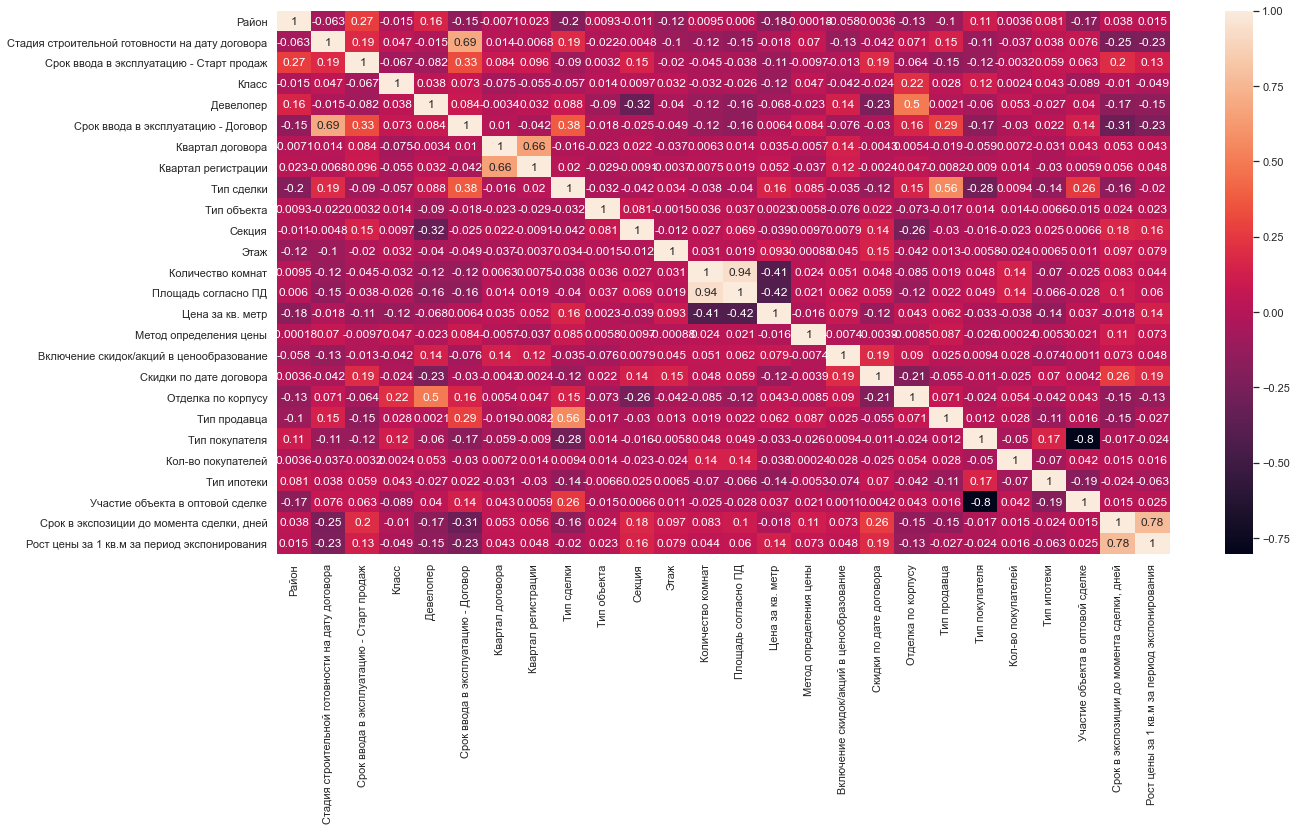

In [69]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [71]:
(df.corr())

,Район,Стадия строительной готовности на дату договора,Срок ввода в эксплуатацию - Старт продаж,Класс,Девелопер,Срок ввода в эксплуатацию - Договор,Квартал договора,Квартал регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
Район,1.000000,-0.063222,0.272613,-0.015175,0.158375,-0.145032,-0.007119,0.023464,-0.202023,0.009349,-0.010610,-0.120632,0.009530,0.005983,-0.175771,-0.000182,-0.058205,0.003640,-0.128864,-0.104724,0.111313,0.003610,0.080947,-0.169953,0.037771,0.014642
Стадия строительной готовности на дату договора,-0.063222,1.000000,0.186185,0.047479,-0.015256,0.691076,0.013607,-0.006805,0.191303,-0.021560,-0.004803,-0.102609,-0.116056,-0.145993,-0.017548,0.070387,-0.125017,-0.041870,0.070725,0.145584,-0.110479,-0.036997,0.038002,0.075823,-0.246711,-0.226904
Срок ввода в эксплуатацию - Старт продаж,0.272613,0.186185,1.000000,-0.067442,-0.082067,0.327680,0.084447,0.096499,-0.090499,0.003174,0.153192,-0.019748,-0.045426,-0.037926,-0.108459,-0.009719,-0.012985,0.190306,-0.064187,-0.152431,-0.120296,-0.003187,0.059094,0.063379,0.202901,0.131595
Класс,-0.015175,0.047479,-0.067442,1.000000,0.038161,0.073404,-0.074643,-0.055026,-0.056646,0.013789,0.009668,0.032430,-0.031772,-0.025991,-0.123659,0.047493,-0.041615,-0.023968,0.215596,0.028132,0.119785,0.002410,0.043227,-0.088973,-0.009969,-0.049210
Девелопер,0.158375,-0.015256,-0.082067,0.038161,1.000000,0.084340,-0.003383,0.031933,0.088291,-0.090491,-0.319438,-0.040278,-0.118480,-0.158454,-0.067615,-0.023437,0.137139,-0.227097,0.497257,0.002087,-0.060180,0.053155,-0.026599,0.039740,-0.173205,-0.153503
Срок ввода в эксплуатацию - Договор,-0.145032,0.691076,0.327680,0.073404,0.084340,1.000000,0.010486,-0.042213,0.375607,-0.017858,-0.024581,-0.048805,-0.124751,-0.155066,0.006437,0.084222,-0.076219,-0.029750,0.156404,0.287449,-0.172354,-0.029948,0.022142,0.136542,-0.307552,-0.227560
Квартал договора,-0.007119,0.013607,0.084447,-0.074643,-0.003383,0.010486,1.000000,0.660044,-0.016442,-0.022602,0.022282,-0.036848,0.006320,0.014418,0.034682,-0.005729,0.135069,-0.004345,0.005351,-0.019284,-0.059086,0.007208,-0.031374,0.042526,0.053452,0.042723
Квартал регистрации,0.023464,-0.006805,0.096499,-0.055026,0.031933,-0.042213,0.660044,1.000000,0.020428,-0.029168,-0.009085,-0.003682,0.007453,0.018540,0.051612,-0.036695,0.117067,-0.002414,0.047105,-0.008165,-0.009037,0.014083,-0.030466,0.005866,0.056352,0.047531
Тип сделки,-0.202023,0.191303,-0.090499,-0.056646,0.088291,0.375607,-0.016442,0.020428,1.000000,-0.031622,-0.041815,0.033990,-0.037911,-0.040156,0.160283,0.085098,-0.035146,-0.120572,0.152770,0.556732,-0.279746,0.009410,-0.144228,0.258162,-0.161069,-0.019851
Тип объекта,0.009349,-0.021560,0.003174,0.013789,-0.090491,-0.017858,-0.022602,-0.029168,-0.031622,1.000000,0.080795,-0.001519,0.035735,0.037253,0.002309,0.005755,-0.075502,0.022398,-0.073207,-0.017130,0.014481,0.013552,-0.006643,-0.015183,0.023925,0.022694
